# Sentiment Analysis on Financial Dataset - NLP:

## Import Libraries

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seaborn
import warnings
warnings.filterwarnings('ignore')

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

In [28]:
import spacy
import re
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## Load Dataset:

In [6]:
df = pd.read_csv("/content/FinancialData.csv",delimiter=',',encoding='latin-1')

In [7]:
df.head()

,neutral,"According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing ."
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...


### Rename the column Indexes:

In [8]:
# Rename the column labels..

df = df.rename(columns={'neutral':'sentiment','According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .':'Message'})

In [9]:
df.head()

,sentiment,Message
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...


In [11]:
# find the shape of the dataset..

df.shape

(4845, 2)

In [12]:
df.describe()

,sentiment,Message
count,4845,4845
unique,3,4837
top,neutral,TELECOMWORLDWIRE-7 April 2006-TJ Group Plc sel...
freq,2878,2


In [13]:
df.dtypes

sentiment    object
Message      object
dtype: object

In [14]:
df.groupby('sentiment').describe()

Message                                                            \
            count unique                                                top   
sentiment                                                                     
negative      604    604  The international electronic industry company ...   
neutral      2878   2872  Ahlstrom 's share is quoted on the NASDAQ OMX ...   
positive     1363   1363  With the new production plant the company woul...   

                
          freq  
sentiment       
negative     1  
neutral      2  
positive     1

### Data Visualisation:

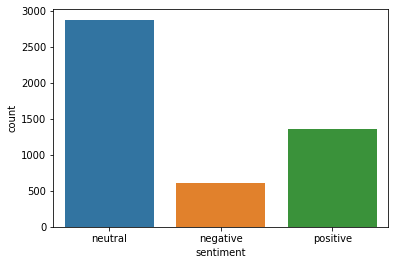

In [18]:
import seaborn as sns

sns.countplot(df['sentiment'])

In [19]:
# find the length of the Message in dataset..

df['data_len'] = df['Message'].apply(len)
df.head(6)

,sentiment,Message,data_len
0,neutral,Technopolis plans to develop in stages an area...,190
1,negative,The international electronic industry company ...,228
2,positive,With the new production plant the company woul...,206
3,positive,According to the company 's updated strategy f...,203
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...,178
5,positive,"For the last quarter of 2010 , Componenta 's n...",193


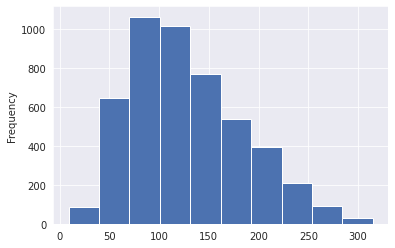

In [20]:
sns.set({'figure.facecolor':'blue'})
df['data_len'].plot(kind='hist')

In [21]:
# some stastical analysis on data_len ..

df.data_len.describe()

count    4845.000000
mean      128.132301
std        56.532012
min         9.000000
25%        84.000000
50%       119.000000
75%       163.000000
max       315.000000
Name: data_len, dtype: float64

## Data Preprocessing:

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4845 entries, 0 to 4844
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  4845 non-null   object
 1   Message    4845 non-null   object
 2   data_len   4845 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 113.7+ KB


In [23]:
# convert categorical into numerical on sentiment column..

def cat_to_num(sentiment):
    if sentiment == 'neutral':
        return 0
    elif sentiment == 'negative':
        return 1
    else:
        return 2

df['label_class'] = df['sentiment'].apply(cat_to_num)
df.head()

,sentiment,Message,data_len,label_class
0,neutral,Technopolis plans to develop in stages an area...,190,0
1,negative,The international electronic industry company ...,228,1
2,positive,With the new production plant the company woul...,206,2
3,positive,According to the company 's updated strategy f...,203,2
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...,178,2


In [29]:
# Remove all special characters using Regex..

filt_df = []

for i in range(len(df)):
    
    #removing the all the characters except the alphabets
    Message = re.sub('[^a-zA-Z]' , ' ' , df['Message'][i])
    
    #lowering the text
    Message = Message.lower()
    
    #spliting the text into lists
    Message = Message.split()
    ps = PorterStemmer()
    Message = [ps.stem(word) for word in Message if word not in set(stopwords.words('english'))]
    Message = ' '.join(Message)
    filt_df.append(Message)

In [30]:
filt_df[0:6]

['technopoli plan develop stage area less squar meter order host compani work comput technolog telecommun statement said',
 'intern electron industri compani elcoteq laid ten employe tallinn facil contrari earlier layoff compani contract rank offic worker daili postime report',
 'new product plant compani would increas capac meet expect increas demand would improv use raw materi therefor increas product profit',
 'accord compani updat strategi year baswar target long term net sale growth rang oper profit margin net sale',
 'financ aspocomp growth aspocomp aggress pursu growth strategi increasingli focus technolog demand hdi print circuit board pcb',
 'last quarter componenta net sale doubl eur eur period year earlier move zero pre tax profit pre tax loss eur']

In [31]:
df['Message']

0       Technopolis plans to develop in stages an area...
1       The international electronic industry company ...
2       With the new production plant the company woul...
3       According to the company 's updated strategy f...
4       FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...
                              ...                        
4840    LONDON MarketWatch -- Share prices ended lower...
4841    Rinkuskiai 's beer sales fell by 6.5 per cent ...
4842    Operating profit fell to EUR 35.4 mn from EUR ...
4843    Net sales of the Paper segment decreased to EU...
4844    Sales in Finland decreased by 10.5 % in Januar...
Name: Message, Length: 4845, dtype: object

In [32]:
df.sentiment.head()

0     neutral
1    negative
2    positive
3    positive
4    positive
Name: sentiment, dtype: object

In [33]:
df.Message.head()

0    Technopolis plans to develop in stages an area...
1    The international electronic industry company ...
2    With the new production plant the company woul...
3    According to the company 's updated strategy f...
4    FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...
Name: Message, dtype: object

In [34]:
df.sentiment.shape

(4845,)

In [35]:
df.Message.shape

(4845,)

## Converting into Vectors & Model Building:

In [36]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=500,ngram_range=(1,3))
X = cv.fit_transform(filt_df).toarray()

In [37]:
# Dependent Feature

y = df.sentiment

In [38]:
from sklearn.feature_extraction.text import TfidfTransformer
# tf=TfidfTransformer()

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state = 0)
X_train.shape, y_train.shape

((3876, 500), (3876,))

In [41]:
cv.get_feature_names()[:20]

['ab',
 'ac',
 'accord',
 'account',
 'acquir',
 'acquisit',
 'activ',
 'ad',
 'addit',
 'agre',
 'agreement',
 'aim',
 'alma',
 'alma media',
 'alreadi',
 'also',
 'america',
 'amount',
 'amount eur',
 'analyst']

Accuracy score : 0.7337461300309598


array(['neutral'], dtype=object)

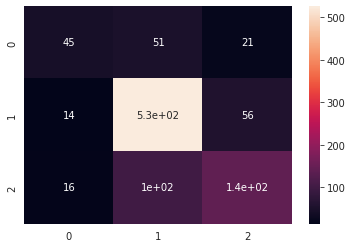

In [43]:
# Building Logistic Regression model..

classifier = LogisticRegression()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

# confusion matrix..

cm  = confusion_matrix(y_test , y_pred)
sns.heatmap(cm , annot=True)
print('Accuracy score :',accuracy_score(y_test , y_pred))

# predictions..

X_pred = np.array(['The food was delicious'])
X_pred = cv.transform(X_pred).toarray()
classifier.predict(X_pred)

In [44]:
# classification report..

print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

    negative       0.60      0.38      0.47       117
     neutral       0.78      0.88      0.83       596
    positive       0.65      0.55      0.59       256

    accuracy                           0.73       969
   macro avg       0.67      0.60      0.63       969
weighted avg       0.72      0.73      0.72       969



In [49]:
pd.DataFrame(confusion_matrix(y_test,y_pred),columns=['pred neutral','pred neg','pred pos'],index=['act neutral','act neg','act pos'])

,pred neutral,pred neg,pred pos
act neutral,45,51,21
act neg,14,526,56
act pos,16,100,140


## Building Various models to predict the Accuracy:

In [50]:
models= {MultinomialNB():'MNB',
GaussianNB():'GNB',
DecisionTreeClassifier():'DTC',
RandomForestClassifier():'RTC'}

for i in models.keys():
    i.fit(X_train,y_train)

In [51]:
for model, model_name in models.items():
    print(f'accuracy_score {model_name}',model.score(X_test,y_test)*100,'%')

accuracy_score MNB 67.3890608875129 %
accuracy_score GNB 47.57481940144479 %
accuracy_score DTC 64.08668730650155 %
accuracy_score RTC 72.96181630546955 %


So, we see that Logistic Regression and Random Forest Classifier both are give good accuracy of 73%.

In [52]:
#saving the model data in pickle file
import pickle
pickle.dump(classifier,open(r'C:\projects\Sentimental Analysis - NLP\data\model.pkl','wb'))